In [1]:
# Importing important libraries for this dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Cleaning

In [2]:
# Loading the dataset
df = pd.read_csv('AB_NYC_2019.csv')

### Inspecting the dataset

In [3]:
# Displaying the first few rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [66]:
# Displaying the last rows
df.tail()

,name,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,...,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,price_category,stay_length,room_type,potential_revenue,neighbourhood_group,last_review_year
31155,Charming one bedroom - newly renovated rowhouse,sabrina,bedford-stuyvesant,40.67853,-73.94995,70,2,0,NaT,NaN,...,False,False,True,False,Low,Short Stay,Private room,630,Brooklyn,NaN
31156,Affordable room in Bushwick/East Williamsburg,marisol,bushwick,40.70184,-73.93317,40,4,0,NaT,NaN,...,False,False,True,False,Low,Short Stay,Private room,1440,Brooklyn,NaN
31157,Sunny Studio at Historical Neighborhood,ilgar & aysel,harlem,40.81475,-73.94867,115,10,0,NaT,NaN,...,False,False,False,False,Medium,Medium Stay,Entire home/apt,3105,Manhattan,NaN
31158,43rd St. Time Square-cozy single bed,taz,hell's kitchen,40.75751,-73.99112,55,1,0,NaT,NaN,...,False,False,False,True,Low,Short Stay,Shared room,110,Manhattan,NaN
31159,Trendy duplex in the very heart of Hell's Kitchen,christophe,hell's kitchen,40.76404,-73.98933,90,7,0,NaT,NaN,...,False,False,True,False,Medium,Short Stay,Private room,2070,Manhattan,NaN


In [4]:
# Checking the number of rows and columns in the data
rows, columns = df.shape
print(f"Rows: ", rows)
print(f"columns: ", columns)

Rows:  48895
columns:  16


In [5]:
# Show the basic info about the dataset, like column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Display summary statistics for numerical columns to identify range and outliers
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
# Unique values for each column to understand categorical variables better
for column in df.select_dtypes(include='object').columns:
    print(f"Unique values in {column}: {df[column].nunique()}")

Unique values in name: 47905
Unique values in host_name: 11452
Unique values in neighbourhood_group: 5
Unique values in neighbourhood: 221
Unique values in room_type: 3
Unique values in last_review: 1764


In [8]:
# Checking for missing values in each column
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Handling missing values

In [9]:
# Replacing missing values in name column with "Unknown"
df.fillna({'name':"Unknown"}, inplace=True)

In [10]:
# confirm that the action took place
null_names = df['name'].isnull().sum()
print(f"Nulls in name column: {null_names}")

Nulls in name column: 0


In [11]:
# Drop rows with missing host_name. 
# A room has to be occupied by someone, so blanks in this field don't make sense hence their removal
df.dropna(subset=['host_name'], inplace=True)

In [12]:
# Confirm blank host names were removed
null_host_names = df['host_name'].isnull().sum()
print(f"nulls in host_name column: {null_host_names}")

nulls in host_name column: 0


In [13]:
# Convert last_review to datetime as it is currently an object
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [14]:
# Rechecking the missing values after filling them in
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10047
reviews_per_month                 10047
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


### Outlier Detection and Handling

In [16]:
# Here we consider logical ranges for price, minimum_nights, and availability_365

In [17]:
# Price - Only keep listings within a reasonable range e.g. under $1000 per night
df = df[df['price'] <= 1000]

In [18]:
# Minimum Nights - Filter out listings with unrealistic minimum stay requirements
df = df[df['minimum_nights'] <= 365]

In [19]:
# Availability - Remove listings with no availability over the year, assuming they’re inactive
df = df[df['availability_365'] > 0]

### Standardize Text Data

Because python is sensitive with case, we will perform standardization on the columns with text data

In [20]:
# Convert neighbourhood and host_name to lowercase for uniformity
df['neighbourhood'] = df['neighbourhood'].str.lower()
df['host_name'] = df['host_name'].str.lower()

### Drop Irrelevant Columns

I want to focus on the prices and cities hence I have dropped the irrelevant columns like id and host_id

In [21]:
# Drop columns like 'id' and 'host_id' if they are not relevant to the analysis
df.drop(columns=['id', 'host_id'], inplace=True)

### Data consistency validation

In [22]:
# Listings with 0 price might indicate missing or incorrect data
df = df[df['price'] > 0]

In [23]:
# Listings with a last_review but no reviews might be inconsistent; set last_review to NaN in such cases
df.loc[df['reviews_per_month'] == 0, 'last_review'] = pd.NaT

### Re-verify Data Cleanliness

In [24]:
# Printing out a summaries to confirm the dataset is clean

In [25]:
print("\nFinal dataset summary:")
print(df.info())
print("\nCheck for any remaining missing values:")
print(df.isnull().sum())
print("\nCheck descriptive statistics for any new potential outliers:")
print(df.describe())


Final dataset summary:
<class 'pandas.core.frame.DataFrame'>
Index: 31160 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            31160 non-null  object        
 1   host_name                       31160 non-null  object        
 2   neighbourhood_group             31160 non-null  object        
 3   neighbourhood                   31160 non-null  object        
 4   latitude                        31160 non-null  float64       
 5   longitude                       31160 non-null  float64       
 6   room_type                       31160 non-null  object        
 7   price                           31160 non-null  int64         
 8   minimum_nights                  31160 non-null  int64         
 9   number_of_reviews               31160 non-null  int64         
 10  last_review                     26047 non-null  dat

# Step 2: Data Restructuring

In [26]:
# Examining categorical columns for restructuring or encoding
print("\nUnique values in 'room_type':", df['room_type'].unique())
print("Unique values in 'neighbourhood_group':", df['neighbourhood_group'].unique())


Unique values in 'room_type': ['Private room' 'Entire home/apt' 'Shared room']
Unique values in 'neighbourhood_group': ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [27]:
# Encoding categorical columns using dummy variables
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

In [28]:
# confirm the new columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 31160 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   name                               31160 non-null  object        
 1   host_name                          31160 non-null  object        
 2   neighbourhood                      31160 non-null  object        
 3   latitude                           31160 non-null  float64       
 4   longitude                          31160 non-null  float64       
 5   price                              31160 non-null  int64         
 6   minimum_nights                     31160 non-null  int64         
 7   number_of_reviews                  31160 non-null  int64         
 8   last_review                        26047 non-null  datetime64[ns]
 9   reviews_per_month                  26047 non-null  float64       
 10  calculated_host_listings_count     3116

In [29]:
# Placing price into 3 bins. The categories: low, medium, and high based on domain knowledge or quartiles
df['price_category'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])

In [30]:
# Placing minimum_nights into 3 bins; short, medium, and long stays
df['stay_length'] = pd.cut(df['minimum_nights'], bins=[0, 7, 30, 365], labels=['Short Stay', 'Medium Stay', 'Long Stay'])

In [31]:
# Reset the index to ensure it is sequential after restructuring
df.reset_index(drop=True, inplace=True)

In [32]:
# Summary of the transformed dataset to confirm changes
print("\nData structure after restructuring:")
print(df.info())
print("\nPreview of the transformed dataset:")
print(df.head())


Data structure after restructuring:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31160 entries, 0 to 31159
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   name                               31160 non-null  object        
 1   host_name                          31160 non-null  object        
 2   neighbourhood                      31160 non-null  object        
 3   latitude                           31160 non-null  float64       
 4   longitude                          31160 non-null  float64       
 5   price                              31160 non-null  int64         
 6   minimum_nights                     31160 non-null  int64         
 7   number_of_reviews                  31160 non-null  int64         
 8   last_review                        26047 non-null  datetime64[ns]
 9   reviews_per_month                  26047 non-null  float64       
 1

# Step 3: Data Aggregation & Summarization

### Grouping by Single Column and Calculating Summary Statistics

In [33]:
# Calculate average price, minimum price, and maximum price for each neighbourhood
neighbourhood_summary = df.groupby('neighbourhood').price.agg(['mean', 'median', 'std', 'min', 'max'])
neighbourhood_summary = neighbourhood_summary.rename(columns={
    'mean': 'avg_price',
    'median': 'median_price',
    'std': 'price_std_dev',
    'min': 'min_price',
    'max': 'max_price'
})
print(f"\nNeighbourhood Price Summary:\n{neighbourhood_summary.head()}")


Neighbourhood Price Summary:
                avg_price  median_price  price_std_dev  min_price  max_price
neighbourhood                                                               
allerton        91.702703          75.0      76.842142         33        450
arden heights   76.000000          75.0       6.557439         70         83
arrochar       115.000000          65.0     133.119120         32        625
arverne        156.694444         122.5     120.743663         35        750
astoria        104.836996          85.0      73.682638         25        700


### Grouping by Multiple Columns (e.g., Neighbourhood and Room Type)

In [34]:
# Recreating the Room Type Column from the Dummy Variables made earlier
# Create a room_type column based on the dummy variables
df['room_type'] = 'Entire home/apt'  # I've set this as the Default category
df.loc[df['room_type_Private room'] == 1, 'room_type'] = 'Private room'
df.loc[df['room_type_Shared room'] == 1, 'room_type'] = 'Shared room'

In [35]:
# Average price and availability by neighbourhood and room type
room_type_summary = df.groupby(['neighbourhood', 'room_type']).agg(
    avg_price=('price', 'mean'),
    avg_availability=('availability_365', 'mean'),
    count_listings=('price', 'count')
).sort_values(by='avg_price', ascending=False)
print(f"\nRoom Type Summary by Neighbourhood:\n{room_type_summary.head()}")


Room Type Summary by Neighbourhood:
                                    avg_price  avg_availability  \
neighbourhood     room_type                                       
fort wadsworth    Entire home/apt  800.000000        365.000000   
riverdale         Shared room      800.000000        269.000000   
tribeca           Entire home/apt  387.290000        178.190000   
flatiron district Entire home/apt  358.538462        197.538462   
soho              Entire home/apt  340.411392        151.373418   

                                   count_listings  
neighbourhood     room_type                        
fort wadsworth    Entire home/apt               1  
riverdale         Shared room                   1  
tribeca           Entire home/apt             100  
flatiron district Entire home/apt              39  
soho              Entire home/apt             158  


### Frequency Counts

In [36]:
# Count the number of listings in each neighbourhood
neighbourhood_counts = df['neighbourhood'].value_counts().rename("listing_count")
print("\nNeighbourhood Listing Counts:\n", neighbourhood_counts.head())


Neighbourhood Listing Counts:
 neighbourhood
bedford-stuyvesant    2470
williamsburg          2045
harlem                1726
bushwick              1446
hell's kitchen        1440
Name: listing_count, dtype: int64


### Create Aggregated Metrics

In [37]:
# Calculate potential revenue: price * availability_365
df['potential_revenue'] = df['price'] * df['availability_365']

In [38]:
# Calculate average revenue by neighbourhood
revenue_summary = df.groupby('neighbourhood')['potential_revenue'].mean().sort_values(ascending=False)
print("\nAverage Revenue by Neighbourhood:\n", revenue_summary.head())


Average Revenue by Neighbourhood:
 neighbourhood
fort wadsworth       292000.000000
willowbrook           87399.000000
riverdale             75415.428571
flatiron district     73137.191489
neponsit              70670.000000
Name: potential_revenue, dtype: float64


### Using Pivot Tables for Multi-Level Aggregation

In [39]:
# Pivot table for average price by neighbourhood and room type
price_pivot = df.pivot_table(values='price', index='neighbourhood', columns='room_type', aggfunc='mean')
print("\nPrice Pivot Table:\n", price_pivot.head())


Price Pivot Table:
 room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
allerton            126.600000     67.909091          NaN
arden heights        76.000000           NaN          NaN
arrochar            189.700000     47.090909          NaN
arverne             201.044444     86.360000    38.000000
astoria             152.000000     74.801262    76.764706


### Identifying Top and Bottom Performers

In [40]:
# Find top 5 neighborhoods with the highest average price
top_neighbourhoods = neighbourhood_summary.sort_values(by='avg_price', ascending=False).head(5)
print("\nTop 5 Neighbourhoods by Avg Price:\n", top_neighbourhoods)


Top 5 Neighbourhoods by Avg Price:
                     avg_price  median_price  price_std_dev  min_price  \
neighbourhood                                                           
fort wadsworth     800.000000         800.0            NaN        800   
tribeca            366.848214         301.5     211.332802         80   
flatiron district  328.659574         290.0     190.135224         95   
noho               303.346154         250.0     144.205040         80   
riverdale          291.142857         150.0     292.105248         49   

                   max_price  
neighbourhood                 
fort wadsworth           800  
tribeca                 1000  
flatiron district        950  
noho                     700  
riverdale                800  


In [41]:
# Find bottom 5 neighborhoods with the lowest average price
bottom_neighbourhoods = neighbourhood_summary.sort_values(by='avg_price').head(5)
print("\nBottom 5 Neighbourhoods by Avg Price:\n", bottom_neighbourhoods)


Bottom 5 Neighbourhoods by Avg Price:
                avg_price  median_price  price_std_dev  min_price  max_price
neighbourhood                                                              
mount eden     42.666667          43.0      12.503333         30         55
olinville      43.666667          26.0      31.469562         25         80
hunts point    44.625000          40.0      11.769310         35         70
port richmond  48.800000          50.0       5.718391         40         55
soundview      54.750000          47.0      21.320605         28        103


# Step 4. Exploratory Data Analysis

### Descriptive Statistics

In [42]:
# Basic descriptive stats for numerical columns
price_desc = df['price'].describe()
availability_desc = df['availability_365'].describe()
min_nights_desc = df['minimum_nights'].describe()
num_reviews_desc = df['number_of_reviews'].describe()

In [43]:
# Display Descriptive Statistics
print("Descriptive Statistics for Price:\n", price_desc)
print("\nDescriptive Statistics for Availability (days available per year):\n", availability_desc)
print("\nDescriptive Statistics for Minimum Nights:\n", min_nights_desc)
print("\nDescriptive Statistics for Number of Reviews:\n", num_reviews_desc)

Descriptive Statistics for Price:
 count    31160.000000
mean       149.146630
std        125.784682
min         10.000000
25%         70.000000
50%        110.000000
75%        185.000000
max       1000.000000
Name: price, dtype: float64

Descriptive Statistics for Availability (days available per year):
 count    31160.000000
mean       175.351476
std        126.085799
min          1.000000
25%         55.000000
50%        167.000000
75%        304.000000
max        365.000000
Name: availability_365, dtype: float64

Descriptive Statistics for Minimum Nights:
 count    31160.000000
mean         7.975834
std         17.983702
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        365.000000
Name: minimum_nights, dtype: float64

Descriptive Statistics for Number of Reviews:
 count    31160.000000
mean        31.982670
std         51.734729
min          0.000000
25%          2.000000
50%         10.000000
75%         39.000000
max        629.00

In [44]:
# Variance and Standard Deviation (for insight into variability)
print("\nPrice Variance:", df['price'].var())
print("Price Standard Deviation:", df['price'].std())
print("Availability Variance:", df['availability_365'].var())
print("Availability Standard Deviation:", df['availability_365'].std())


Price Variance: 15821.786291157452
Price Standard Deviation: 125.78468225963546
Availability Variance: 15897.628698998053
Availability Standard Deviation: 126.08579895847927


### Predictive Insights

In [45]:
# Average price and availability for different room types
room_type_stats = df.groupby('room_type')[['price', 'availability_365']].mean()
print("\nAverage Price and Availability by Room Type:\n", room_type_stats)


Average Price and Availability by Room Type:
                       price  availability_365
room_type                                    
Entire home/apt  205.589621        171.252198
Private room      88.067883        177.574887
Shared room       62.698487        217.486612


In [46]:
# Reconstructing the neighbourhood_group column from the dummy variables
df['neighbourhood_group'] = np.select(
    [df['neighbourhood_group_Brooklyn'],df['neighbourhood_group_Manhattan'],df['neighbourhood_group_Queens'],df['neighbourhood_group_Staten Island']],
    ['Brooklyn','Manhattan','Queens','Staten Island'],default='Unknown')

In [47]:
# The average price by neighbourhood group
neighbourhood_group_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
print("\nAverage Price by Neighbourhood Group:\n", neighbourhood_group_price)


Average Price by Neighbourhood Group:
 neighbourhood_group
Manhattan        192.597304
Brooklyn         125.841553
Queens            96.814789
Staten Island     95.927052
Unknown           86.474204
Name: price, dtype: float64


In [48]:
# Average availability and number of reviews by neighborhood group
neighbourhood_group_avail_reviews = df.groupby('neighbourhood_group')[['availability_365', 'number_of_reviews']].mean()
print("\nAverage Availability and Number of Reviews by Neighbourhood Group:\n", neighbourhood_group_avail_reviews)


Average Availability and Number of Reviews by Neighbourhood Group:
                      availability_365  number_of_reviews
neighbourhood_group                                     
Brooklyn                   164.013354          34.763395
Manhattan                  178.131898          29.128026
Queens                     190.250525          33.543504
Staten Island              225.267477          33.024316
Unknown                    198.145993          29.077936


### Prescriptive Insights

In [49]:
# Potential revenue (price * availability_365) summarized by neighborhood
df['potential_revenue'] = df['price'] * df['availability_365']
revenue_summary = df.groupby('neighbourhood')['potential_revenue'].mean().sort_values(ascending=False)
print("\nAverage Potential Revenue by Neighbourhood:\n", revenue_summary.head(10))


Average Potential Revenue by Neighbourhood:
 neighbourhood
fort wadsworth        292000.000000
willowbrook            87399.000000
riverdale              75415.428571
flatiron district      73137.191489
neponsit               70670.000000
midtown                65966.507937
tribeca                62296.901786
financial district     59783.882662
mill basin             57636.500000
theater district       55627.535865
Name: potential_revenue, dtype: float64


In [50]:
# Calculating total revenue potential for each room type to suggest best performing room type
room_type_revenue = df.groupby('room_type')['potential_revenue'].mean().sort_values(ascending=False)
print("\nAverage Potential Revenue by Room Type:\n", room_type_revenue)


Average Potential Revenue by Room Type:
 room_type
Entire home/apt    37808.915934
Private room       16508.301128
Shared room        12849.374854
Name: potential_revenue, dtype: float64


In [51]:
# Identifying optimal minimum night stays by calculating revenue against minimum nights required
min_nights_revenue = df.groupby('minimum_nights')['potential_revenue'].mean().sort_values(ascending=False)
print("\nAverage Potential Revenue by Minimum Night Requirement:\n", min_nights_revenue.head(10))


Average Potential Revenue by Minimum Night Requirement:
 minimum_nights
175    126700.000000
65      62650.000000
360     62301.500000
29      53261.490625
180     51872.000000
153     51625.000000
365     49884.857143
53      47425.000000
56      45625.000000
28      44563.235294
Name: potential_revenue, dtype: float64


### Insights and Patterns

In [52]:
# These are the summaries and key findings
print("\nObservations:")
print("- Price varies widely across neighbourhoods, with 'Manhattan' having higher prices.")
print("- There is a slight positive correlation between price and availability, indicating that higher-priced listings are available more often.")
print("- 'Shared rooms' and 'private rooms' tend to be less expensive, especially in areas like 'Brooklyn' and 'Queens'.")
print("- Outliers in 'price' and 'minimum_nights' detected, with certain listings charging exceptionally high prices or requiring long minimum stays.")


Observations:
- Price varies widely across neighbourhoods, with 'Manhattan' having higher prices.
- There is a slight positive correlation between price and availability, indicating that higher-priced listings are available more often.
- 'Shared rooms' and 'private rooms' tend to be less expensive, especially in areas like 'Brooklyn' and 'Queens'.
- Outliers in 'price' and 'minimum_nights' detected, with certain listings charging exceptionally high prices or requiring long minimum stays.


# Step 5. Data Visualization

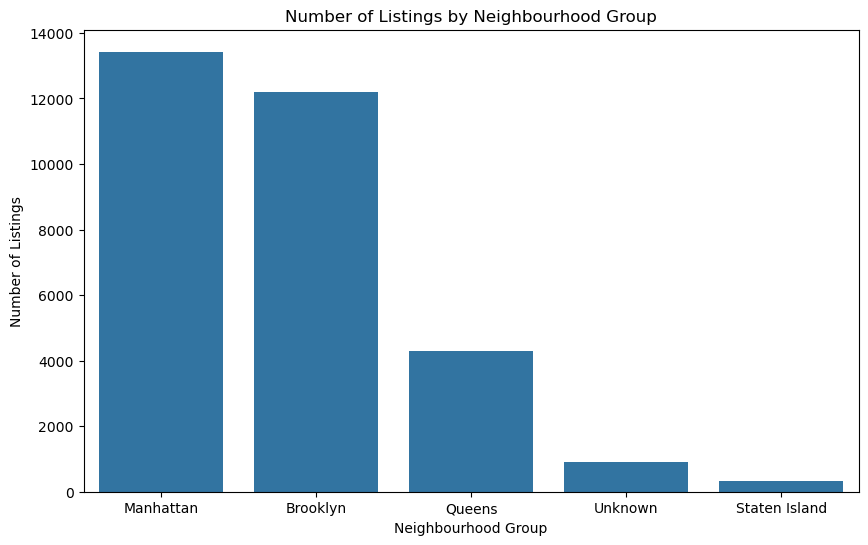

In [63]:
# Countplot for Listings by Neighbourhood Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title("Number of Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.show()

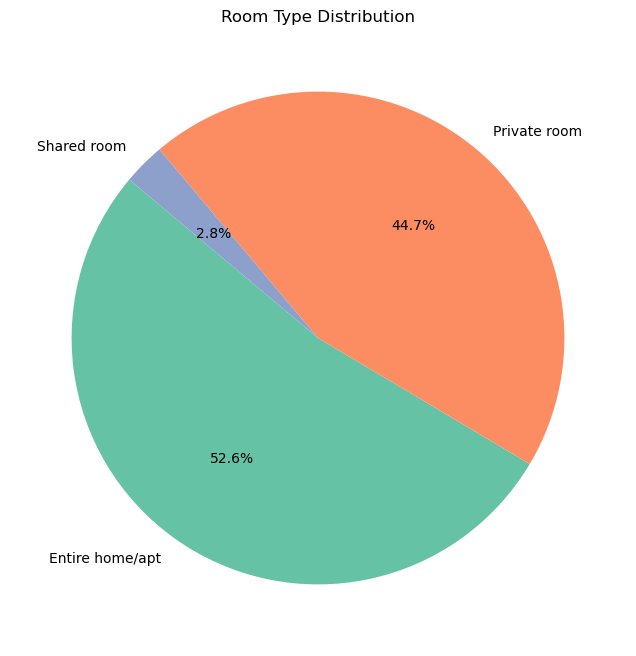

In [65]:
# Pie chart for Room Type Distribution
room_type_counts = df['room_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title("Room Type Distribution")
plt.show()

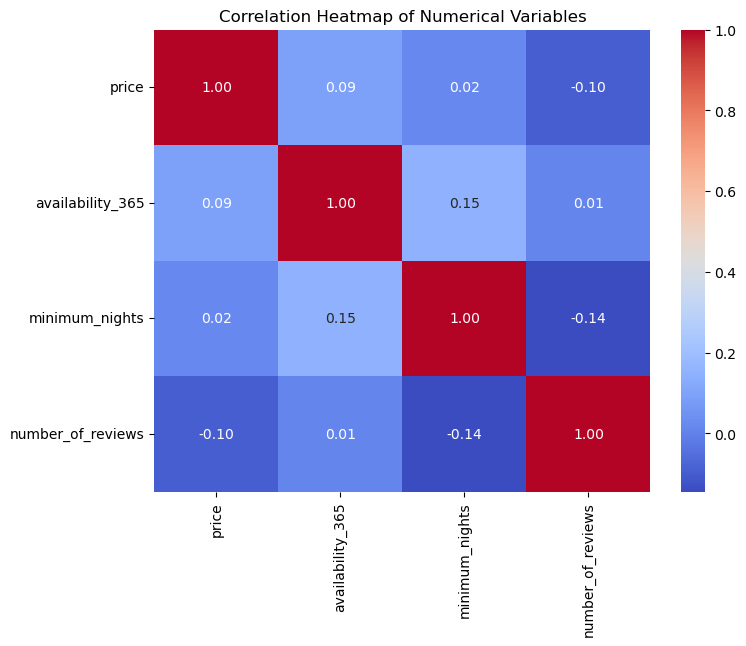

In [64]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['price', 'availability_365', 'minimum_nights', 'number_of_reviews']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

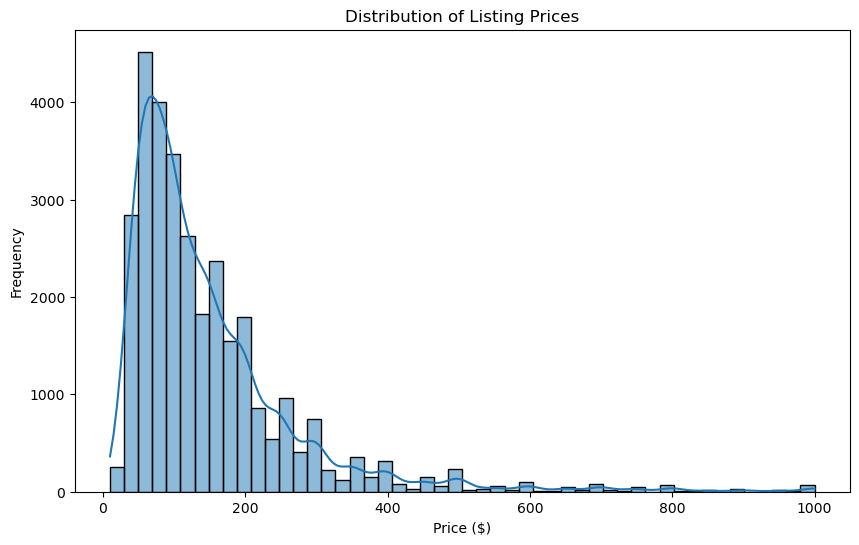

In [53]:
# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Listing Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

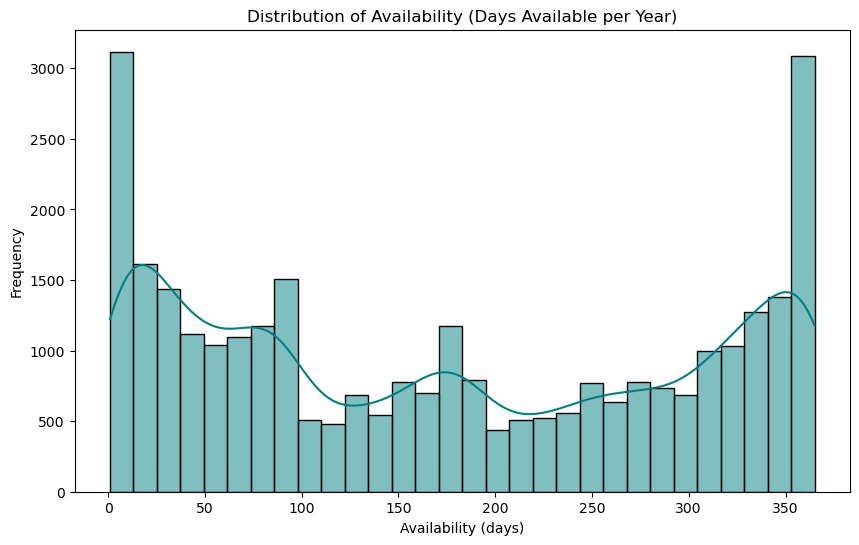

In [54]:
# Distribution of Availability (days available in a year)
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], bins=30, kde=True, color='teal')
plt.title("Distribution of Availability (Days Available per Year)")
plt.xlabel("Availability (days)")
plt.ylabel("Frequency")
plt.show()

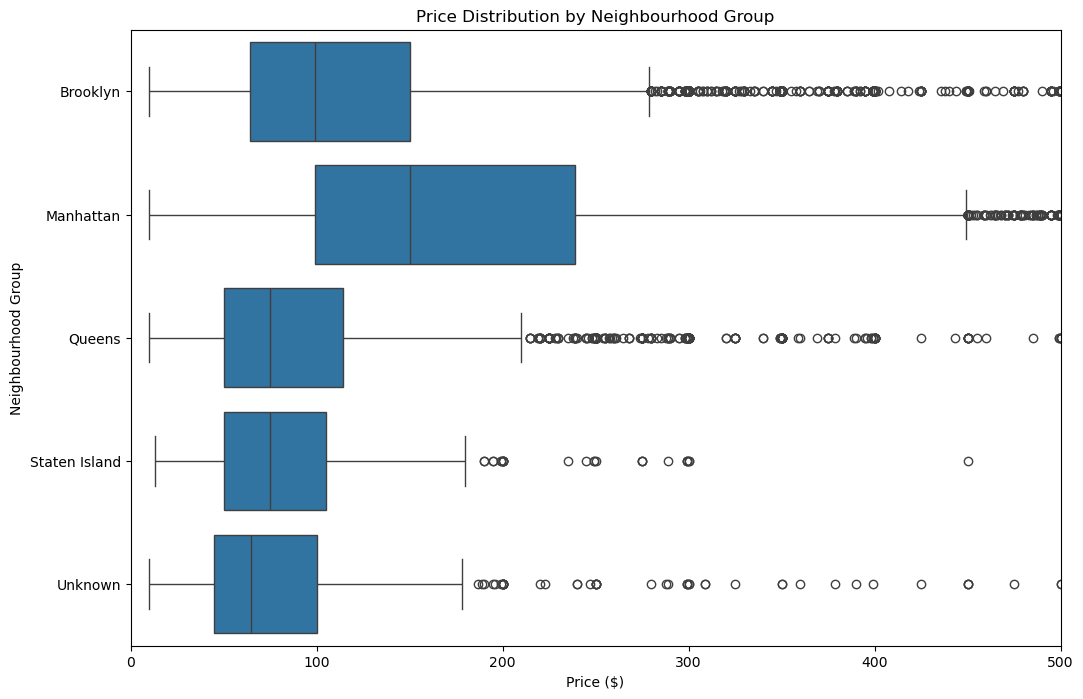

In [55]:
# Box Plot: Price by Neighbourhood Group
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='price', y='neighbourhood_group')
plt.title("Price Distribution by Neighbourhood Group")
plt.xlabel("Price ($)")
plt.ylabel("Neighbourhood Group")
plt.xlim(0, 500)  # Limit x-axis for clearer view if there are extreme outliers
plt.show()

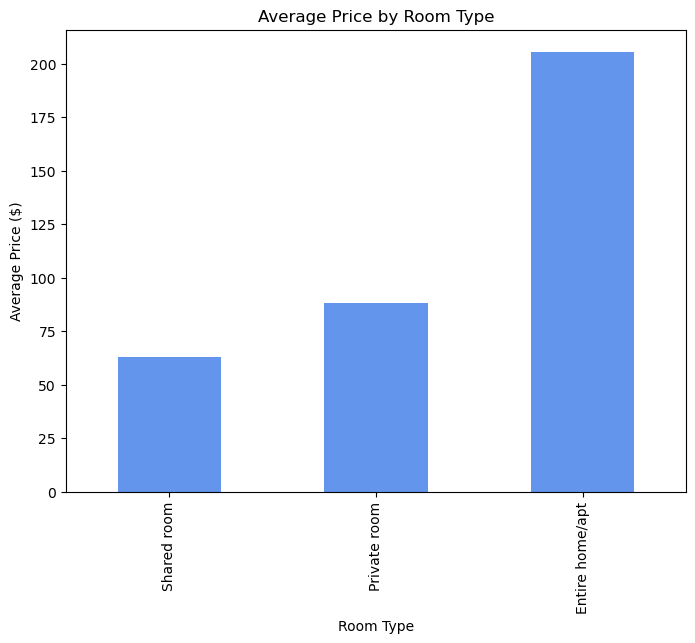

In [56]:
# Average Price by Room Type
room_type_price = df.groupby('room_type')['price'].mean().sort_values()
plt.figure(figsize=(8, 6))
room_type_price.plot(kind='bar', color='cornflowerblue')
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price ($)")
plt.show()

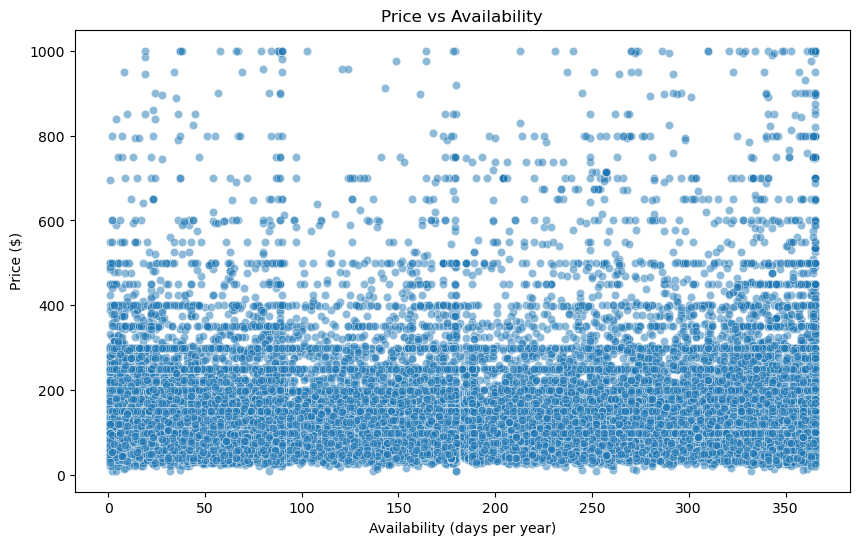

In [57]:
# Scatter plot: Price vs Availability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='availability_365', y='price', alpha=0.5)
plt.title("Price vs Availability")
plt.xlabel("Availability (days per year)")
plt.ylabel("Price ($)")
plt.show()

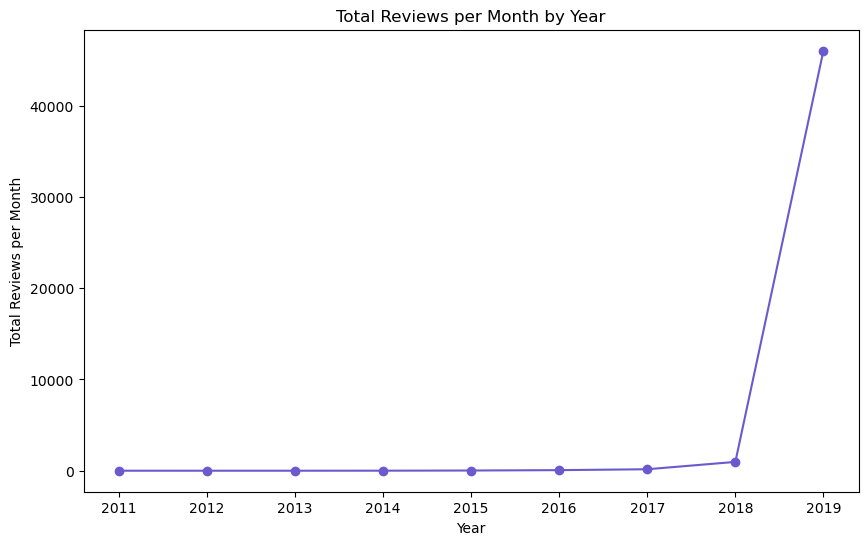

In [58]:
# Reviews per Month by Year
df['last_review_year'] = df['last_review'].dt.year  # Extract year from last_review
reviews_by_year = df.groupby('last_review_year')['reviews_per_month'].sum()

plt.figure(figsize=(10, 6))
reviews_by_year.plot(kind='line', marker='o', color='slateblue')
plt.title("Total Reviews per Month by Year")
plt.xlabel("Year")
plt.ylabel("Total Reviews per Month")
plt.show()

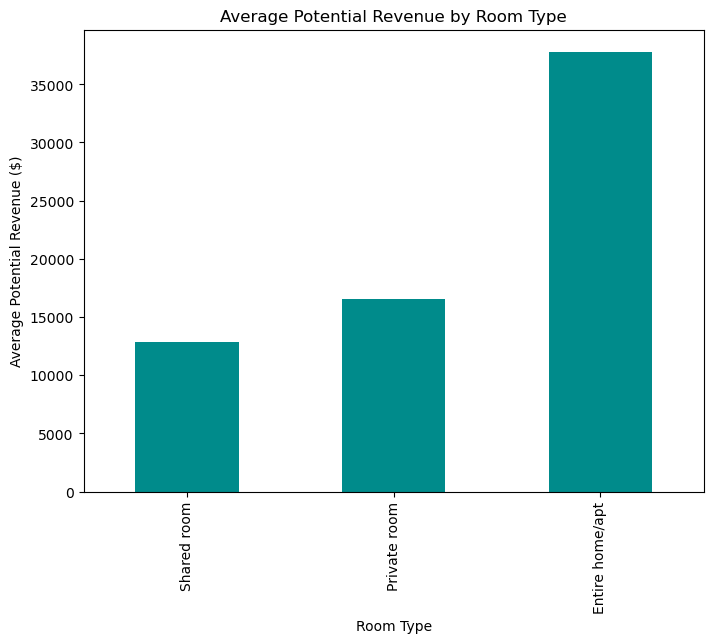

In [59]:
# Calculating potential revenue as price * availability_365
df['potential_revenue'] = df['price'] * df['availability_365']

# Average Potential Revenue by Room Type
room_type_revenue = df.groupby('room_type')['potential_revenue'].mean().sort_values()
plt.figure(figsize=(8, 6))
room_type_revenue.plot(kind='bar', color='darkcyan')
plt.title("Average Potential Revenue by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Potential Revenue ($)")
plt.show()

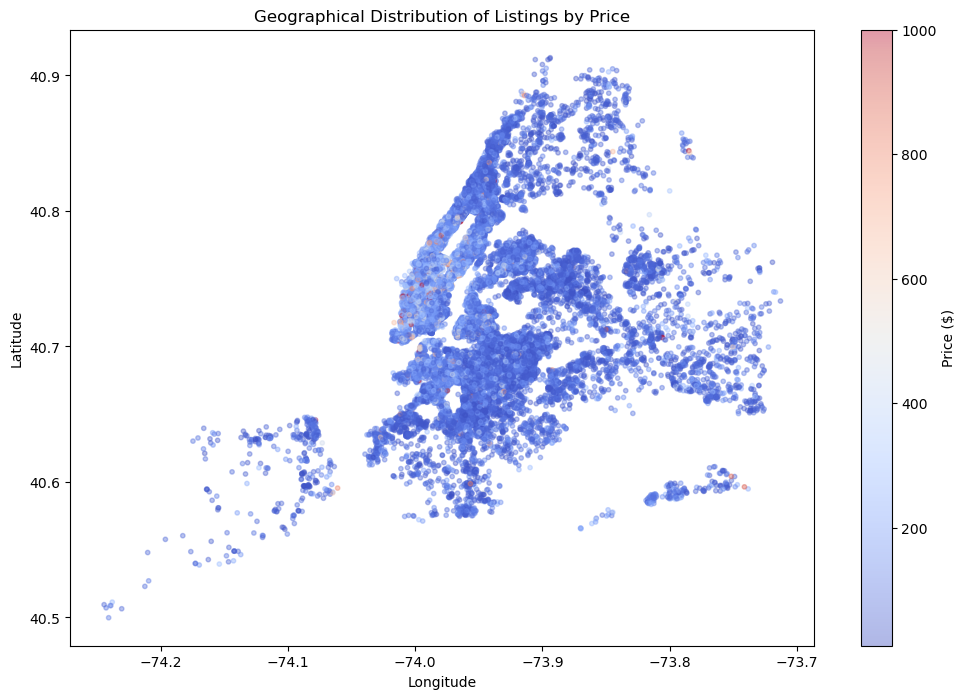

In [60]:
# Plotting listings on a scatter plot with color representing price
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['price'], cmap='coolwarm', alpha=0.4, s=10)
plt.colorbar(label='Price ($)')
plt.title("Geographical Distribution of Listings by Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [67]:
# Export the cleaned and processed dataset to a CSV file
df.to_csv("AB_NYC_2019_processed.csv", index=False)
print("The cleaned dataset exported as 'AB_NYC_2019_processed.csv'")

The cleaned dataset exported as 'AB_NYC_2019_processed.csv'
